In [3]:
import numpy as np
from scipy.stats import pareto, expon
import doctest
import matplotlib.pyplot as plt
# Note on indexing:
# We will be using Python's standard zero-based indexing. However, the original theoretical problem used 1-based indexing.
# Therefore, the generated vectors `y` and `d` will be indexed starting from 0 in the code, and we will adjust subscripts as necessary.


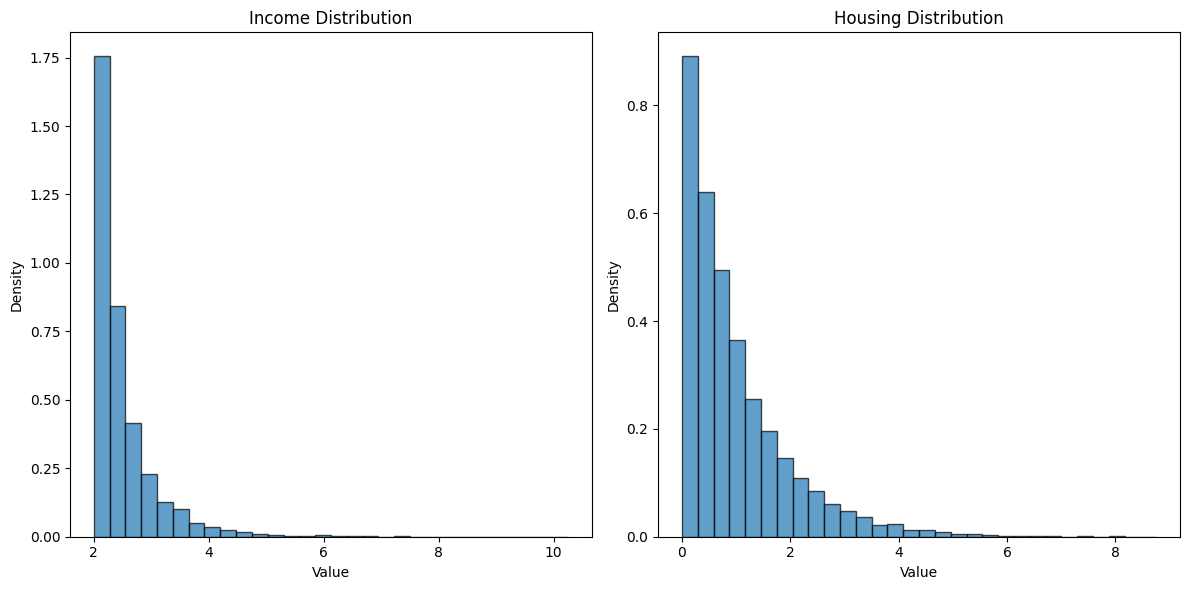

In [ ]:
def gen_data(n, y_min, alpha, mu, c, seed=None):
   
  # Validate parameters
    if y_min <= c:
        raise ValueError
    if alpha <= 1:
        raise ValueError
    if mu <= 0:
        raise ValueError

    """
    Generate simulation data from Pareto(y_min, alpha) and Exp(mu).

    Parameters
    ----------
    n : int
        Number of samples for each distribution.
    y_min : float
        The minimum parameter of the Pareto distribution (scale parameter),
        must be greater than c.
    alpha : float
        The shape parameter of the Pareto distribution, must be > 1.
    mu : float
        The mean of the exponential distribution, must be > 0.
    c : float
        A constant such that y_min > c.
    seed : int, optional
        Seed for the random number generator.

    Returns
    -------
    y : ndarray
        Array of length n with Pareto distributed samples, sorted in ascending order.
    d : ndarray
        Array of length n with Exponential distributed samples (with mean mu),
        sorted in ascending order.
    """
    if seed is not None:
        np.random.seed(seed)

    U = np.random.uniform(size=n)
    y = y_min * (1 - U) ** (-1.0 / alpha)

    U_exp = np.random.uniform(size=n)
    d = -mu * np.log(U_exp)

    y = np.sort(y)
    d = np.sort(d)

    return y, d

# Generate samples for visualization
n = 10000
y_min = 2.0
alpha = 5
mu = 1.0
c = 1.0
seed = 42

y_samples, d_samples = gen_data(n, y_min, alpha, mu, c, seed)

# Plot the distributions
plt.figure(figsize=(12, 6))

# Pareto distribution
plt.subplot(1, 2, 1)
plt.hist(y_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Exponential distribution
plt.subplot(1, 2, 2)
plt.hist(d_samples, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.title("Housing Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [14]:

def equilibrium_price_recursive(n, c, y, d, j):
    """
    Calculate the equilibrium price of house j using a basic recursive approach.

    Parameters:
        n (int): Number of houses
        c (float): Parameter related to income floor (not used directly in this function)
        y (np.ndarray): Array of incomes (sorted in descending order)
        d (np.ndarray): Array of distances (sorted in ascending order)
        j (int): House number (0-based indexing)

    Returns:
        float: Equilibrium price of house j

    Example:
    >>> y, d = generate_simulation_data(5, 10, 2.5, 1, 5, seed=42)
    >>> equilibrium_price_recursive(5, 5, y, d, 0)
    13.506256691193927
    """
    if j < 0 or j >= n:
        raise ValueError("House number j must be between 0 and n-1.")
    
    # Base case: the price of the last house is equal to the income of the last agent
    if j == n - 1:
        return y[j]
    
    # Recursive calculation for price of house j
    theta_j = np.exp(-(d[j + 1] - d[j]))
    p_j_plus_1 = equilibrium_price_recursive(n, c, y, d, j + 1)
    p_j = theta_j * p_j_plus_1 + (1 - theta_j) * y[j + 1]
    
    return p_j

def calculate_all_prices(n, c, y, d):
    """
    Calculate the equilibrium prices for all houses.

    Parameters:
        n (int): Number of houses
        c (float): Parameter related to income floor (not used directly in this function)
        y (np.ndarray): Array of incomes (sorted in descending order)
        d (np.ndarray): Array of distances (sorted in ascending order)

    Returns:
        np.ndarray: Array of equilibrium prices for all houses

    Example:
    >>> y, d = generate_simulation_data(5, 10, 2.5, 1, 5, seed=42)
    >>> calculate_all_prices(5, 5, y, d)
    array([13.50625669, 12.85366025, 11.90582058, 11.64417424, 10.14282439])
    """
    prices = np.zeros(n)
    for j in range(n):
        prices[j] = equilibrium_price_recursive(n, c, y, d, j)
    return prices

# Example usage
y, d = gen_data(5, 10, 2.5, 1, 5, seed=42)
prices = calculate_all_prices(5, 5, y, d)
print("Equilibrium Prices:", prices)

NameError: name 'gen_data' is not defined

Equilibrium Prices: [23.25569677 22.82906497 21.0674582  20.7020471  20.7020471 ]
Average House Price: 21.711262828618594
Median House Price: 21.06745819696203
Inter-Quartile Range of House Prices: 2.127017864470581


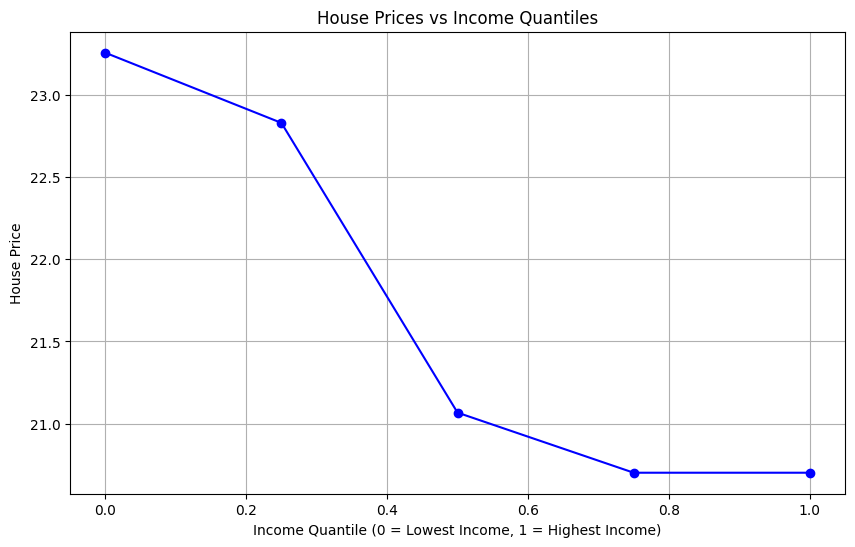

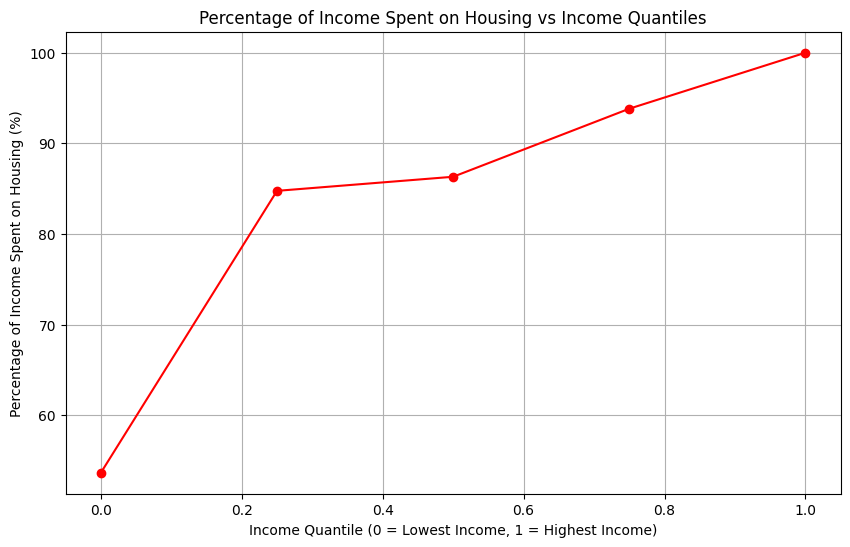

In [18]:
def calculate_all_prices(n, c, y, d):
    """
    Calculate the equilibrium prices for all houses.

    Parameters:
        n (int): Number of houses
        c (float): Parameter related to income floor (not used directly in this function)
        y (np.ndarray): Array of incomes (sorted in descending order)
        d (np.ndarray): Array of distances (sorted in ascending order)

    Returns:
        np.ndarray: Array of equilibrium prices for all houses

    Example:
    >>> y, d = generate_simulation_data(5, 10, 2.5, 1, 5, seed=42)
    >>> calculate_all_prices(5, 5, y, d)
    array([13.50625669, 12.85366025, 11.90582058, 11.64417424, 10.14282439])
    """
    prices = np.zeros(n)
    for j in range(n):
        prices[j] = equilibrium_price_recursive(n, c, y, d, j)
    return prices

def calculate_price_statistics(prices):
    """
    Calculate average, median, and inter-quartile range (IQR) of house prices.

    Parameters:
        prices (np.ndarray): Array of house prices

    Returns:
        tuple: (average_price, median_price, iqr_price)
    """
    average_price = np.mean(prices)
    median_price = np.median(prices)
    q1 = np.percentile(prices, 25)
    q3 = np.percentile(prices, 75)
    iqr_price = q3 - q1
    
    return average_price, median_price, iqr_price

def plot_house_prices(prices, incomes):
    """
    Plot the house prices against income quantiles.

    Parameters:
        prices (np.ndarray): Array of house prices
        incomes (np.ndarray): Array of incomes (sorted in descending order)
    """
    n = len(prices)
    income_quantiles = np.linspace(0, 1, n)
    
    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, prices, marker='o', linestyle='-', color='b')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('House Price')
    plt.title('House Prices vs Income Quantiles')
    plt.grid(True)
    plt.show()

def plot_percentage_income_spent_on_housing(prices, incomes):
    """
    Plot the percentage of income spent on housing against income quantiles.

    Parameters:
        prices (np.ndarray): Array of house prices
        incomes (np.ndarray): Array of incomes (sorted in descending order)
    """
    n = len(prices)
    income_quantiles = np.linspace(0, 1, n)
    percentage_spent = (prices / incomes) * 100
    
    plt.figure(figsize=(10, 6))
    plt.plot(income_quantiles, percentage_spent, marker='o', linestyle='-', color='r')
    plt.xlabel('Income Quantile (0 = Lowest Income, 1 = Highest Income)')
    plt.ylabel('Percentage of Income Spent on Housing (%)')
    plt.title('Percentage of Income Spent on Housing vs Income Quantiles')
    plt.grid(True)
    plt.show()

# Example usage
y, d = generate_simulation_data(5, 10, 2.5, 1, 5, seed=42)
prices = calculate_all_prices(5, 5, y, d)
print("Equilibrium Prices:", prices)

# Calculate statistics
average_price, median_price, iqr_price = calculate_price_statistics(prices)
print("Average House Price:", average_price)
print("Median House Price:", median_price)
print("Inter-Quartile Range of House Prices:", iqr_price)

# Plot house prices and percentage of income spent on housing
plot_house_prices(prices, y)
plot_percentage_income_spent_on_housing(prices, y)


### Doctest Checking

In [22]:
result = doctest.testmod(verbose=False)
if result[0] == 0:
    print(("Congratulations! You have passed all "+str(result[1])+" tests"))
else:
    print("Rats!")

**********************************************************************
File "__main__", line 16, in __main__.calculate_all_prices
Failed example:
    calculate_all_prices(5, 5, y, d)
Expected:
    array([13.50625669, 12.85366025, 11.90582058, 11.64417424, 10.14282439])
Got:
    array([23.25569677, 22.82906497, 21.0674582 , 20.7020471 , 20.7020471 ])
**********************************************************************
File "__main__", line 17, in __main__.equilibrium_price_recursive
Failed example:
    equilibrium_price_recursive(5, 5, y, d, 0)
Expected:
    13.506256691193927
Got:
    np.float64(23.25569677353679)
**********************************************************************
File "__main__", line 19, in __main__.generate_simulation_data
Failed example:
    y
Expected:
    array([13.50625669, 12.22166631, 11.49878893, 11.28951813, 10.14282439])
Got:
    array([43.33585903, 26.93332156, 24.40769033, 22.0648025 , 20.7020471 ])
***************************************************